In [1]:
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


Recommendations for 'Scream 3' : 


NameError: name 'movie2idx' is not defined

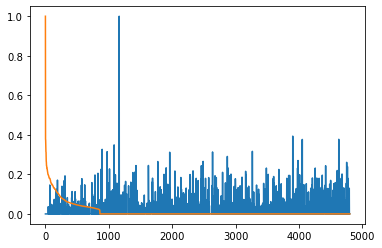

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

class IFIDF:

    df = pd.read_csv('tmdb_5000_movies.csv')
    df.head()
    x = df.iloc[0]
    #print(x)
    #print(x['genres'])
    #print(x['keywords'])
    j = json.loads(x['genres'])
    #print(j)
    ' '.join(''.join(jj['name'].split()) for jj in j)


# convert the relevent data for each movie into a single string
# to be injested in the TFIDFVectorizer
    def genres_and_KeyWord_to_string(row):
        genres = json.loads(row['genres'])
        genres = ' '.join(''.join(j['name'].split()) for j in genres)

        keywords = json.loads(row['keywords'])
        keywords = ' '.join(''.join(j['name'].split()) for j in keywords)

        return '%s %s' % (genres,keywords)
    
    df['string'] = df.apply(genres_and_KeyWord_to_string, axis = 1)
    tfidf = TfidfVectorizer(max_features=2000)
    X = tfidf.fit_transform(df['string'])
    #print(X)
    movie2idx = pd.Series(df.index, index=df['title'])
    #print(movie2idx)
    idx = movie2idx['Scream 3']
    #print(idx)
    query = X[idx]
    #print(query)
    query.toarray()
    scores = cosine_similarity(query, X)
    #print(scores)
    scores = scores.flatten()
    plt.plot(scores)
    (-scores).argsort()
    plt.plot(scores[(-scores).argsort(0)]);
    recommend_idx = (-scores).argsort()[1:6]
    df['title'].iloc[recommend_idx]


    def recommend(title):    
        idx = movie2idx[title]
        if type(idx) == pd.Series:
            idx = idx.iloc[0]
        query = X[idx]
        scores = cosine_similarity(query, X)
        scores = scores.flatten()
        recommend_idx = (-scores).argsort()[1:6]
        return df['title'].iloc[recommend_idx]

    print("Recommendations for 'Scream 3' : ")
    print(recommend('Scream 3'))

    print("Recommendations for 'Mortal Kombat' : ")
    print(recommend('Mortal Kombat'))

    print("Recommendations for 'Runaway Bride' : ")
    print(recommend('Runaway Bride'))

 

